In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing data
df=pd.read_csv('C:/Users/bd/lighthouse-data-notes/Week_5/Day_5/mid-term-project-I/fuel.txt')
pd.set_option('display.max_columns',100)
df.head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,tdomt_gallons,tint_gallons,total_gallons,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,6,20100.0,PO,PO,Polar Air Cargo Airways,3,3046196.0,652131.0,11460546.0,0.0,12112677.0,15158873.0,3046196.0,12178755.0,15224951.0,5840261,1524121.0,22141638.0,0.0,23665759.0,29506020,5840261,23665759.0,29506020,2015
1,9,20363.0,9E,9E,Endeavor Air Inc.,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2018
2,10,21629.0,KD,KD,Western Global,1,0.0,0.0,0.0,0.0,0.0,0.0,2233.0,0.0,2233.0,0,0.0,0.0,0.0,0.0,0,2233,0.0,2233,2015
3,4,21167.0,CP,CP,Compass Airlines,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2017
4,8,20409.0,B6,B6,JetBlue Airways,3,60372656.0,0.0,0.0,16345598.0,16345598.0,76718254.0,60372656.0,16345598.0,76718254.0,138981422,0.0,0.0,37628533.0,37628533.0,176609955,138981422,37628533.0,176609955,2018


In [3]:
df.isnull().sum()

month                0
airline_id           1
unique_carrier       1
carrier              0
carrier_name         1
carrier_group_new    0
sdomt_gallons        1
satl_gallons         1
spac_gallons         1
slat_gallons         2
sint_gallons         1
ts_gallons           1
tdomt_gallons        3
tint_gallons         1
total_gallons        6
sdomt_cost           0
satl_cost            1
spac_cost            1
slat_cost            1
sint_cost            1
ts_cost              0
tdomt_cost           0
tint_cost            1
total_cost           0
year                 0
dtype: int64

In [4]:
data=df.copy()

# Gallons per month

In [5]:
gallons=data[['month','total_gallons']].groupby('month').sum().reset_index()
gallons.sort_values('total_gallons', ascending=False)

,month,total_gallons
6,7,8.390187e+09
7,8,8.258306e+09
5,6,8.057899e+09
4,5,7.816662e+09
2,3,7.601791e+09
3,4,7.417560e+09
8,9,7.386270e+09
0,1,7.044165e+09
1,2,6.445816e+09
11,12,6.052621e+09


In [6]:
#Calculating the percentage of gallons per month
gallons['perc_gallons']=gallons['total_gallons']/gallons['total_gallons'].sum()*100
weight=[]
for i in data['month']:
    weight.append(float(gallons[gallons['month']==i]['perc_gallons']))

In [7]:
# add it to the data
data['perc_total_gallon']=weight

In [8]:
data.head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,tdomt_gallons,tint_gallons,total_gallons,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year,perc_total_gallon
0,6,20100.0,PO,PO,Polar Air Cargo Airways,3,3046196.0,652131.0,11460546.0,0.0,12112677.0,15158873.0,3046196.0,12178755.0,15224951.0,5840261,1524121.0,22141638.0,0.0,23665759.0,29506020,5840261,23665759.0,29506020,2015,9.349648
1,9,20363.0,9E,9E,Endeavor Air Inc.,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2018,8.570351
2,10,21629.0,KD,KD,Western Global,1,0.0,0.0,0.0,0.0,0.0,0.0,2233.0,0.0,2233.0,0,0.0,0.0,0.0,0.0,0,2233,0.0,2233,2015,6.983655
3,4,21167.0,CP,CP,Compass Airlines,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2017,8.606658
4,8,20409.0,B6,B6,JetBlue Airways,3,60372656.0,0.0,0.0,16345598.0,16345598.0,76718254.0,60372656.0,16345598.0,76718254.0,138981422,0.0,0.0,37628533.0,37628533.0,176609955,138981422,37628533.0,176609955,2018,9.582182


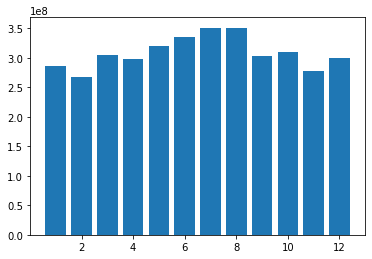

In [9]:
import matplotlib.pyplot as plt
plt.bar(data['month'], data['total_gallons'])
plt.show()

# Gallons per airport

In [10]:
carrier=data[['unique_carrier','total_gallons']].groupby('unique_carrier').sum().reset_index()
carrier.sort_values('total_gallons', ascending=False)

,unique_carrier,total_gallons
14,AA,1.663489e+10
19,DL,1.655025e+10
49,UA,1.595691e+10
55,WN,9.599040e+09
24,FX,5.464666e+09
...,...,...
12,9E,0.000000e+00
40,OH,0.000000e+00
18,CP,0.000000e+00
36,MQ,0.000000e+00


In [11]:
#Calculating the percentage of gallons per carrier
carrier['perc_gallons_carrier']=carrier['total_gallons']/carrier['total_gallons'].sum()*100
weight=[]
for i in data['unique_carrier']:
    if not carrier[carrier['unique_carrier']==i].empty:
        weight.append(float(carrier[carrier['unique_carrier']==i]['perc_gallons_carrier']))
    else:
        weight.append(0)

In [12]:
# add it to the data
data['perc_total_gallon']=weight

In [13]:
data.head()

,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,sint_gallons,ts_gallons,tdomt_gallons,tint_gallons,total_gallons,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year,perc_total_gallon
0,6,20100.0,PO,PO,Polar Air Cargo Airways,3,3046196.0,652131.0,11460546.0,0.0,12112677.0,15158873.0,3046196.0,12178755.0,15224951.0,5840261,1524121.0,22141638.0,0.0,23665759.0,29506020,5840261,23665759.0,29506020,2015,1.015807
1,9,20363.0,9E,9E,Endeavor Air Inc.,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2018,0.000000
2,10,21629.0,KD,KD,Western Global,1,0.0,0.0,0.0,0.0,0.0,0.0,2233.0,0.0,2233.0,0,0.0,0.0,0.0,0.0,0,2233,0.0,2233,2015,0.091413
3,4,21167.0,CP,CP,Compass Airlines,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2017,0.000000
4,8,20409.0,B6,B6,JetBlue Airways,3,60372656.0,0.0,0.0,16345598.0,16345598.0,76718254.0,60372656.0,16345598.0,76718254.0,138981422,0.0,0.0,37628533.0,37628533.0,176609955,138981422,37628533.0,176609955,2018,4.370951


In [14]:
data[['perc_total_gallon','unique_carrier']].to_csv('total_gallon.csv')

# Flights data
Now we are going to import flights data and add the colums percentage of gallons

In [17]:
#importing data
flights=pd.read_csv('C:/Users/bd/lighthouse-data-notes/Week_5/Day_5/mid-term-project-I/fligths_all.csv')
pd.set_option('display.max_columns',100)
flights.head()

,Unnamed: 0,Unnamed: 0.1,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,year,month,minutes,hours,proba_delay_origin,proba_delay_dest,proba_delay_distance,proba_delay_month,weight_delay_hour
0,0,0,2019-06-04,8,UA,UA,2094,21,N815UA,2094,12266,IAH,"Houston, TX",12953,LGA,"New York, NY",1630,1742.0,72.0,12.0,1754.0,2149.0,37.0,2102,2226.0,84.0,0,NaN,0,N,212,224.0,175.0,1,1416,9.0,0.0,12.0,0.0,63.0,NaN,NaN,NaN,NaN,2019,6,26.0,22,17.353601,24.566415,2.509692,75.994695,80.748827
1,1,1,2019-10-14,3,DL,DL,2953,7,N811DZ,2953,12889,LAS,"Las Vegas, NV",14869,SLC,"Salt Lake City, UT",1407,1543.0,96.0,24.0,1607.0,1803.0,5.0,1630,1808.0,98.0,0,NaN,0,N,83,85.0,56.0,1,368,96.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,2019,10,8.0,18,3.417670,15.119363,1.662926,21.618037,40.522342
2,2,2,2019-04-26,2,B6,B6,952,4,N563JB,952,13204,MCO,"Orlando, FL",10721,BOS,"Boston, MA",1303,1419.0,76.0,13.0,1432.0,1705.0,10.0,1601,1715.0,74.0,0,NaN,0,N,178,176.0,153.0,1,1121,0.0,0.0,74.0,0.0,0.0,NaN,NaN,NaN,NaN,2019,4,15.0,17,13.997143,9.630688,0.438686,31.391553,32.768823
3,3,3,2018-07-23,8,UA_CODESHARE,UA,3433,25,N645RW,3433,11292,DEN,"Denver, CO",11109,COS,"Colorado Springs, CO",1400,1357.0,-3.0,10.0,1407.0,1426.0,6.0,1447,1432.0,-15.0,0,NaN,0,N,47,35.0,19.0,1,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,7,32.0,14,18.445215,3.744134,1.968986,89.746990,6.008978
4,4,4,2019-09-25,0,AA_CODESHARE,AA,5206,17,N508AE,5206,11617,EWN,"New Bern/Morehead/Beaufort, NC",11057,CLT,"Charlotte, NC",911,905.0,-6.0,13.0,918.0,1004.0,10.0,1044,1014.0,-30.0,0,NaN,0,N,93,69.0,46.0,1,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,9,14.0,10,-0.214242,7.671904,0.367272,4.458274,-16.404815


In [18]:
# add it to the data
gallons['perc_gallons']=gallons['total_gallons']/gallons['total_gallons'].sum()*100
weight=[]
for i in flights['month']:
    weight.append(float(gallons[gallons['month']==i]['perc_gallons']))
flights['perc_total_gallon']=weight

In [19]:
flights.head()

,Unnamed: 0,Unnamed: 0.1,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,year,month,minutes,hours,proba_delay_origin,proba_delay_dest,proba_delay_distance,proba_delay_month,weight_delay_hour,perc_total_gallon
0,0,0,2019-06-04,8,UA,UA,2094,21,N815UA,2094,12266,IAH,"Houston, TX",12953,LGA,"New York, NY",1630,1742.0,72.0,12.0,1754.0,2149.0,37.0,2102,2226.0,84.0,0,NaN,0,N,212,224.0,175.0,1,1416,9.0,0.0,12.0,0.0,63.0,NaN,NaN,NaN,NaN,2019,6,26.0,22,17.353601,24.566415,2.509692,75.994695,80.748827,9.349648
1,1,1,2019-10-14,3,DL,DL,2953,7,N811DZ,2953,12889,LAS,"Las Vegas, NV",14869,SLC,"Salt Lake City, UT",1407,1543.0,96.0,24.0,1607.0,1803.0,5.0,1630,1808.0,98.0,0,NaN,0,N,83,85.0,56.0,1,368,96.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN,2019,10,8.0,18,3.417670,15.119363,1.662926,21.618037,40.522342,6.983655
2,2,2,2019-04-26,2,B6,B6,952,4,N563JB,952,13204,MCO,"Orlando, FL",10721,BOS,"Boston, MA",1303,1419.0,76.0,13.0,1432.0,1705.0,10.0,1601,1715.0,74.0,0,NaN,0,N,178,176.0,153.0,1,1121,0.0,0.0,74.0,0.0,0.0,NaN,NaN,NaN,NaN,2019,4,15.0,17,13.997143,9.630688,0.438686,31.391553,32.768823,8.606658
3,3,3,2018-07-23,8,UA_CODESHARE,UA,3433,25,N645RW,3433,11292,DEN,"Denver, CO",11109,COS,"Colorado Springs, CO",1400,1357.0,-3.0,10.0,1407.0,1426.0,6.0,1447,1432.0,-15.0,0,NaN,0,N,47,35.0,19.0,1,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,7,32.0,14,18.445215,3.744134,1.968986,89.746990,6.008978,9.735205
4,4,4,2019-09-25,0,AA_CODESHARE,AA,5206,17,N508AE,5206,11617,EWN,"New Bern/Morehead/Beaufort, NC",11057,CLT,"Charlotte, NC",911,905.0,-6.0,13.0,918.0,1004.0,10.0,1044,1014.0,-30.0,0,NaN,0,N,93,69.0,46.0,1,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,9,14.0,10,-0.214242,7.671904,0.367272,4.458274,-16.404815,8.570351


In [19]:
#flights.to_csv('fligths_newvafu.csv')

In [20]:
flights.to_csv('fligths_all_1.csv')